<a href="https://colab.research.google.com/github/shanthakumaar/COVID-19/blob/master/COVID_19_ALEXNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization,ZeroPadding2D
from keras.optimizers import SGD
from keras import applications
from keras.models import Model
import cv2, numpy as np
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from tqdm import tqdm

In [63]:
!nvidia-smi

Thu Apr 16 03:28:22 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    32W / 250W |   8805MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [66]:
!ls "/content/drive/My Drive/research/keras-covid-19/dataset"

covid  normal


In [67]:
os.listdir('/content/drive/My Drive/research/keras-covid-19/dataset')

['covid', 'normal']

In [0]:
covid_path= '/content/drive/My Drive/research/keras-covid-19/dataset/covid'
normal_path= '/content/drive/My Drive/research/keras-covid-19/dataset/normal'

In [0]:
IMG_SIZE=224
labels=[]

In [0]:
def image_read(TRAIN_DIR):
    training_data = []
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path = os.path.join(TRAIN_DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        training_data.append(np.array(img))
    return training_data

In [0]:
def labelss(data,class_value):
  y=np.ones(len(data),dtype=int)*class_value
  return y

In [72]:
covid_path

'/content/drive/My Drive/research/keras-covid-19/dataset/covid'

In [73]:
covid_data=image_read(covid_path)

100%|██████████| 25/25 [00:00<00:00, 27.16it/s]


In [0]:
import matplotlib.pyplot as plt

In [75]:
np.shape(covid_data)

(25, 224, 224, 3)

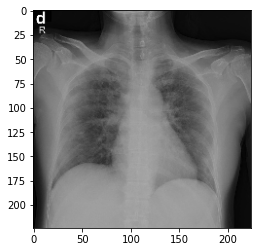

In [76]:
plt.imshow(covid_data[0])

In [0]:
covid_label=labelss(covid_data,1)

In [78]:
covid_label.shape

(25,)

In [79]:
normal_data=image_read(normal_path)

100%|██████████| 25/25 [00:00<00:00, 55.51it/s]


In [0]:
normal_lable=labelss(normal_data,0)

In [81]:
normal_lable

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [0]:
dataset=np.concatenate((normal_data,covid_data))

In [83]:
dataset.shape

(50, 224, 224, 3)

In [0]:
class_labels=np.concatenate((normal_lable,covid_label))

In [85]:
class_labels.shape

(50,)

In [0]:
import sklearn.model_selection as ms

In [0]:
x_train,x_test,y_train,y_test=ms.train_test_split(dataset,class_labels,test_size=0.1,random_state=10)

In [88]:
x_train.shape

(45, 224, 224, 3)

In [0]:
from keras.utils import to_categorical
y= to_categorical(y_train)
y_test=to_categorical(y_test)

In [90]:
y.shape

(45, 2)

In [91]:
y

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
# Initialize model
alexnet = Sequential()

# Layer 1
alexnet.add(Conv2D(96, (11, 11), input_shape=(224,224,3), padding='same'))
alexnet.add(BatchNormalization())
conv1=Activation('relu')
alexnet.add(conv1) 
max_pool_1=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_1)

# Layer 2
alexnet.add(Conv2D(256, (5, 5), padding='same'))
alexnet.add(BatchNormalization())
conv2=Activation('relu')
alexnet.add(conv2)
max_pool_2=MaxPooling2D(pool_size=(2, 2))
alexnet.add(max_pool_2)

# Layer 3
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 4
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(384, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))

# Layer 5
alexnet.add(ZeroPadding2D((1, 1)))
alexnet.add(Conv2D(512, (3, 3), padding='same'))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(MaxPooling2D(pool_size=(2, 2)))

# Layer 6
alexnet.add(Flatten())
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 7
alexnet.add(Dense(1024))
alexnet.add(BatchNormalization())
alexnet.add(Activation('relu'))
alexnet.add(Dropout(0.5))

# Layer 8
alexnet.add(Dense(2))
alexnet.add(BatchNormalization())
alexnet.add(Activation('softmax'))

In [93]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 96)      34944     
_________________________________________________________________
batch_normalization_8 (Batch (None, 224, 224, 96)      384       
_________________________________________________________________
activation_8 (Activation)    (None, 224, 224, 96)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 96)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 256)     614656    
_________________________________________________________________
batch_normalization_9 (Batch (None, 112, 112, 256)     1024      
_________________________________________________________________
activation_9 (Activation)    (None, 112, 112, 256)    

In [0]:
alexnet.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

In [96]:
history=alexnet.fit(x_train, y, batch_size=5, epochs=100, validation_split=0.1, shuffle=True)

Epoch 1/100
8/8 [==============================] - 1s 92ms/step - loss: 0.3093 - accuracy: 0.9500 - val_loss: 32.3088 - val_accuracy: 0.6000
Epoch 2/100
8/8 [==============================] - 1s 70ms/step - loss: 0.2002 - accuracy: 0.9750 - val_loss: 21.2559 - val_accuracy: 0.6000
Epoch 3/100
8/8 [==============================] - 1s 69ms/step - loss: 0.1656 - accuracy: 1.0000 - val_loss: 20.3535 - val_accuracy: 0.6000
Epoch 4/100
8/8 [==============================] - 1s 69ms/step - loss: 0.3370 - accuracy: 0.9500 - val_loss: 19.3420 - val_accuracy: 0.6000
Epoch 5/100
8/8 [==============================] - 1s 68ms/step - loss: 0.1629 - accuracy: 0.9750 - val_loss: 23.1519 - val_accuracy: 0.6000
Epoch 6/100
8/8 [==============================] - 1s 69ms/step - loss: 0.1367 - accuracy: 1.0000 - val_loss: 19.7907 - val_accuracy: 0.6000
Epoch 7/100
8/8 [==============================] - 1s 69ms/step - loss: 0.1658 - accuracy: 1.0000 - val_loss: 11.0369 - val_accuracy: 0.6000
Epoch 8/100
8

In [0]:
import gc 

In [98]:
gc.collect()

32473

In [99]:
x_test.shape

(5, 224, 224, 3)

In [100]:
alexnet.predict(x_test[1].reshape(1,224,224,3))

array([[0.97957164, 0.02042832]], dtype=float32)

In [101]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

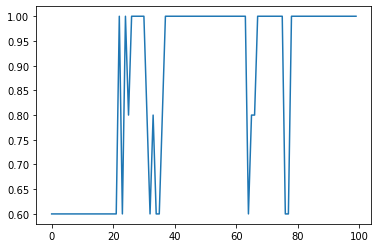

In [102]:
plt.plot(history.history['val_accuracy'])

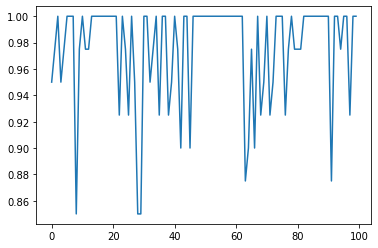

In [105]:
plt.plot(history.history['accuracy'])